# Colorful Image Colorization

In [1]:
import torch
import torchvision
import torch.nn as nn
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
%matplotlib inline
from torch.utils.data import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
import os
import time
from torchvision.datasets import ImageFolder
from matplotlib.pyplot import imshow
torch.manual_seed(101)

### Dataloader

In [2]:
def resize_image(src, size=(256, 256), bgc="white"):
    src.thumbnail(size, Image.ANTIALIAS)
    new_image = Image.new("RGB", size, bgc)
    new_image.paste(src, (int((size[0]-src.size[0]) / 2)), int((size[1] - src.size[1]) / 2))
    return new_image

In [3]:
transform = transforms.Compose([
    transforms.Resize([128, 128]),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.Grayscale(),
    transforms.ToTensor(),
])

In [4]:
def load(path):
    dataset = torchvision.datasets.ImageFolder(root=path,transform = transform)
    
    train_size = int(0.7 * len(dataset))
    test_size = len(dataset) - train_size

    train_set, test_set = torch.utils.data.random_split(dataset, [train_size, test_size])
    
    train_loader = torch.utils.data.DataLoader(
        train_set,
        batch_size=50,
        num_workers=0,
        shuffle=False
    )
    
    test_loader = torch.utils.data.DataLoader(
        test_set,
        batch_size=50,
        num_workers=0,
        shuffle=False
    )

    return train_loader, test_loader

In [5]:
ImageNetTrainLoader, ImageNetTestLoader = load('./Datasets/tiny_imagenet/tiny-imagenet-200/train/')
print(f"train loaders: {ImageNetTrainLoader}")

train loaders: <torch.utils.data.dataloader.DataLoader object at 0x0000014E7D3F3130>


In [6]:
def plot_images(loader):
    # Get a batch of data
    data_iter = iter(loader)
    data, targets = next(data_iter)
    
    # Select 6 random images
    rand_idx = torch.randperm(data.shape[0])[:6]
    data = data[rand_idx]
    targets = targets[rand_idx]
    
    # Create a figure with 6 subplots
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(8, 6))
    
    # Loop over the subplots and display the images
    for i, ax in enumerate(axes.flatten()):
        img = data[i].permute(1, 2, 0).numpy()  # Convert to a numpy array and permute dimensions to [H, W, C]
        ax.imshow(img, cmap="gray")
        ax.set_title(f"Label: {targets[i]}")
        ax.axis("off")
    
    plt.tight_layout()
    plt.show()

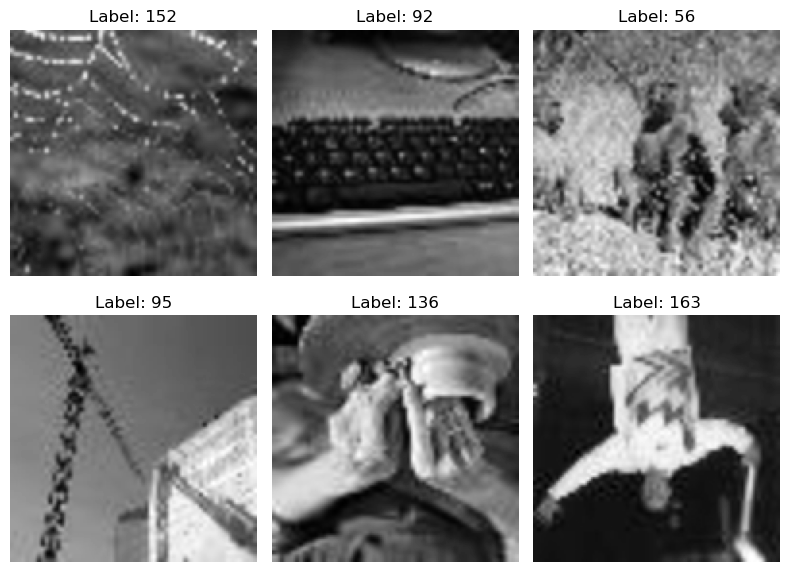

In [7]:
plot_images(ImageNetTrainLoader)

In [8]:
VOCDataset = datasets.VOCDetection('./Datasets/PASCAL_VOC', year='2012', image_set='train', download=True, transform=transform)

Using downloaded and verified file: ./Datasets/PASCAL_VOC\VOCtrainval_11-May-2012.tar
Extracting ./Datasets/PASCAL_VOC\VOCtrainval_11-May-2012.tar to ./Datasets/PASCAL_VOC


In [11]:
train_size = int(0.7 * len(VOCDataset))
test_size = len(VOCDataset) - train_size

train_set, test_set = torch.utils.data.random_split(VOCDataset, [train_size, test_size])

VOCTrainLoader = torch.utils.data.DataLoader(
    train_set,
    batch_size=50,
    num_workers=0,
    shuffle=False
)

VOCTestLoader = torch.utils.data.DataLoader(
    test_set,
    batch_size=50,
    num_workers=0,
    shuffle=False
)

In [12]:
plot_images(VOCTrainLoader)

RuntimeError: each element in list of batch should be of equal size